<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Eika_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports to make sure fileupload to Colab i possible


In [3]:

from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


Read local file

In [4]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['test.csv']), sep=";")
df

,År,Skedesum,Ant_skader
0,2020,1343944,314
1,2019,1591572,350
2,2018,5187645,331
3,2017,3714358,341
4,2016,1292431,468
5,2015,8084348,649
6,2014,4799565,408
7,2013,10631701,819
8,2012,8493763,1011
9,2011,10490844,1141


In [5]:
skade = df["Skedesum"]
år = df["År"]
skadetall = df["Ant_skader"]

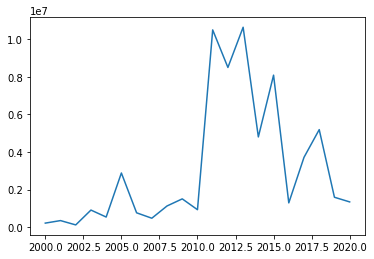

In [34]:
import matplotlib.pyplot as plt
plt.plot(år,skade)
plt.show()

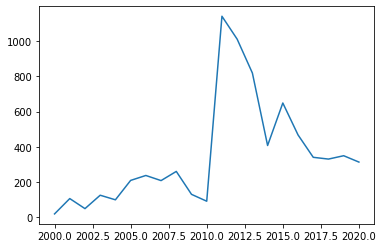

In [33]:
plt.plot(år,skadetall)
plt.show()

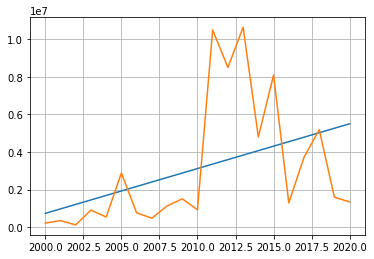

In [32]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det


x = skade
a,b = linreg(range(len(x)),x)  #//your x,y are switched from standard notation
extrapolatedtrendline=[a*index + b for index in range(len(år))] #20 is years, change after desire.

plt.plot(år,extrapolatedtrendline)
plt.plot(år,skade)
plt.grid()
plt.show()

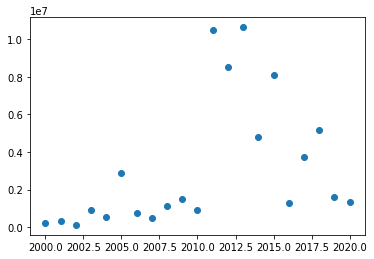

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
x = [år]
y = [skade]

plt.scatter(x,y)

In [26]:
model = linear_model.LinearRegression(fit_intercept=False)
test=model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
model.coef_

In [30]:
x= [np.asarray(item) for item in x]

In [34]:
x_pred = np.array([2021],[2022])
model.predict(x_pred)

TypeError: ignored

In [32]:
x


[array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
        2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])]